In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from pandas import Series,DataFrame
from scipy import stats
from numpy.random import randn
%matplotlib inline

In [3]:
url='https://www.kaggle.com/competitions/titanic/data?select=train.csv'
import webbrowser as wb
wb.open(url)

True

In [148]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


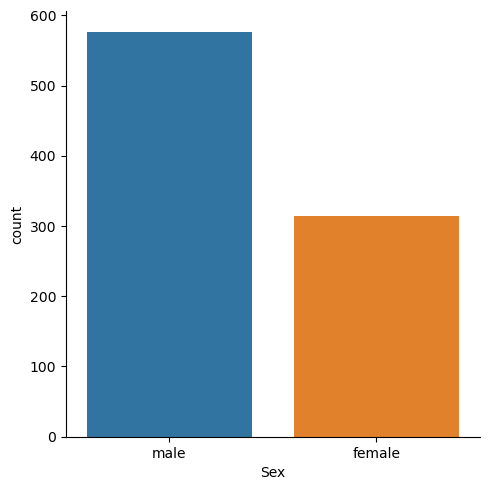

In [71]:
sns.catplot(df,x='Sex',kind='count')

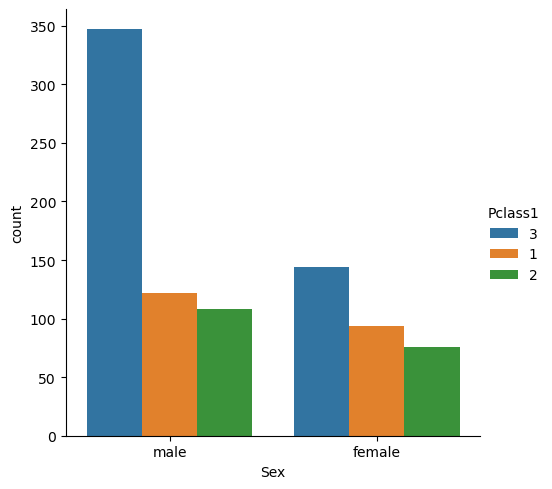

In [162]:
df['Pclass1'] = df['Pclass'].astype(str)
sns.catplot(df,x='Sex',kind='count',hue='Pclass1')

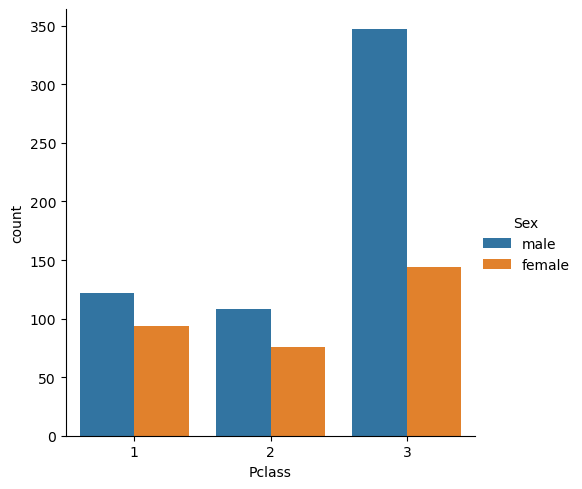

In [77]:
sns.catplot(df,x='Pclass',kind='count',hue='Sex')

In [78]:
def male_female_child(passenger):
    age,sex = passenger


    if age<16:
        return 'child'
    else:
        return sex

In [153]:
df['Person']=df[['Age','Sex']].apply(male_female_child,axis=1)

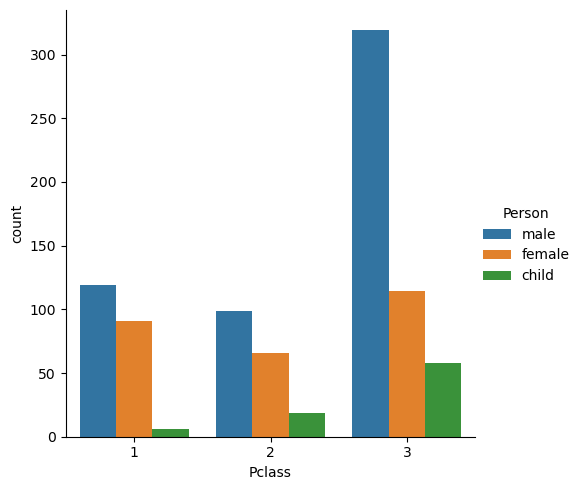

In [81]:
sns.catplot(df,x='Pclass',kind='count',hue='Person')

(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

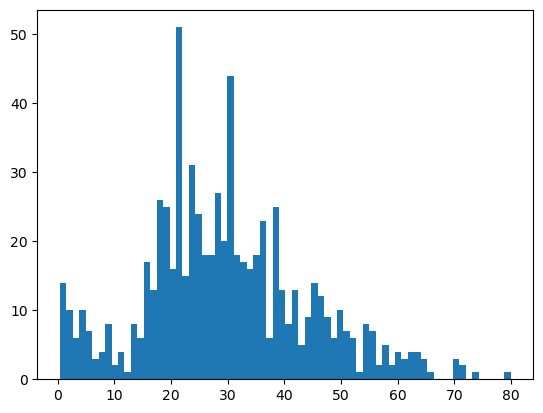

In [84]:
plt.hist(df['Age'],bins=70)

In [88]:
df['Age'].mean()

29.69911764705882

In [90]:
df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


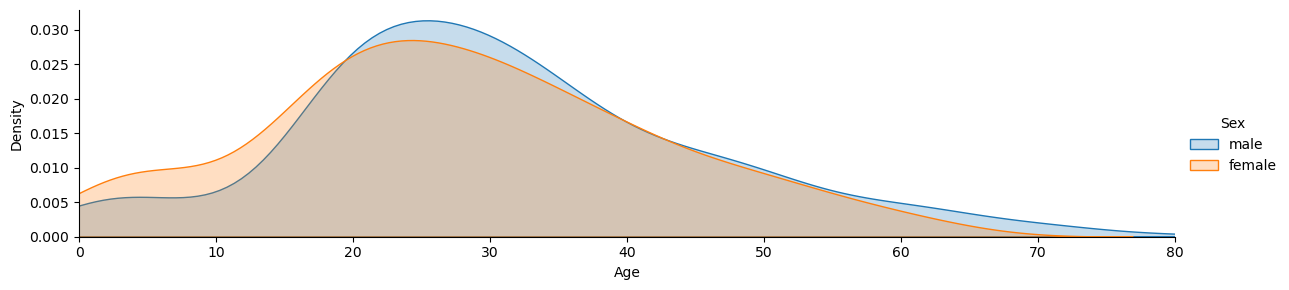

In [95]:
fig= sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


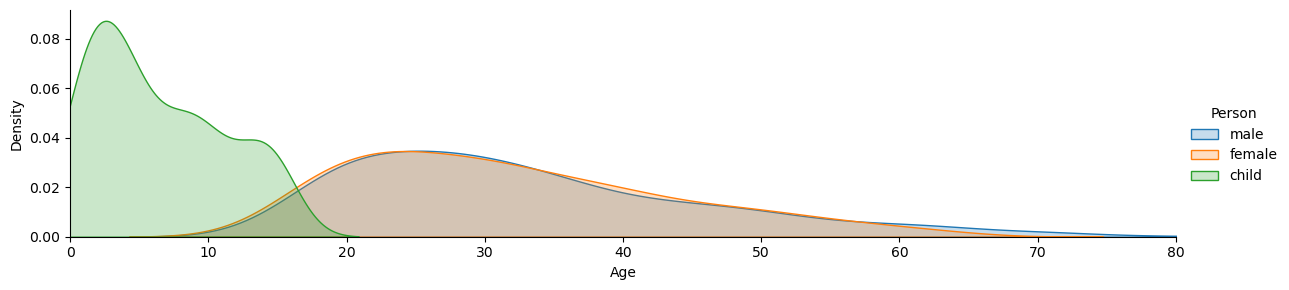

In [96]:
fig= sns.FacetGrid(df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


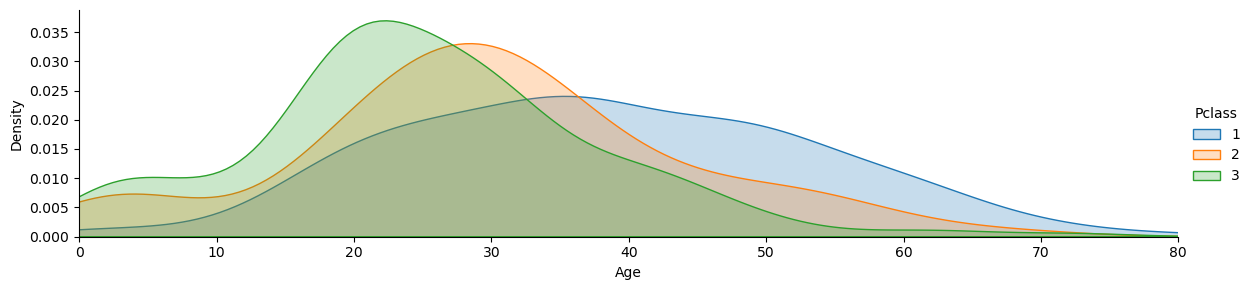

In [97]:
fig= sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [178]:
deck= df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [107]:
Levels=[]
for lvl in deck:
    Levels.append(lvl[0])

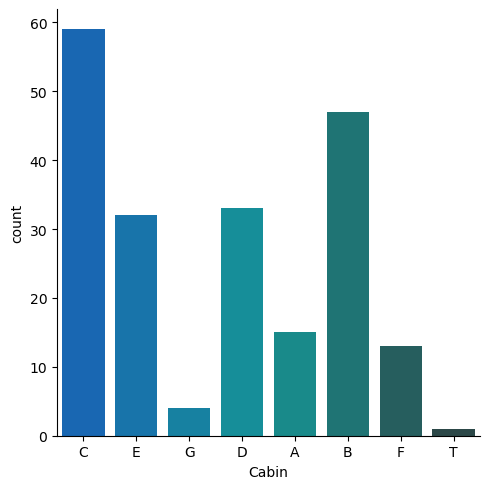

In [105]:
cabin_df= DataFrame(Levels)
cabin_df.columns= ['Cabin']
sns.catplot(cabin_df,x='Cabin',kind='count',palette='winter_d')

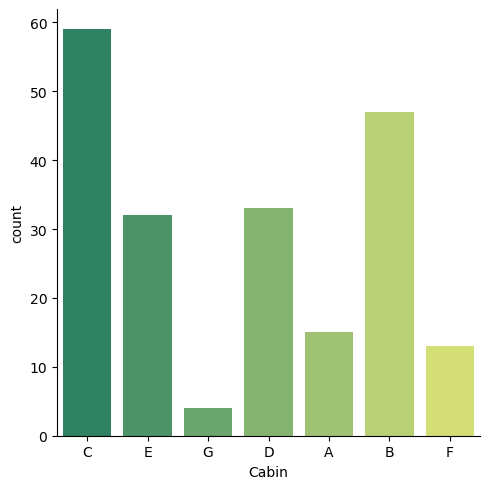

In [177]:
cabin_df=cabin_df[cabin_df!='T']
sns.catplot(cabin_df,x='Cabin',kind='count',palette='summer')

In [111]:
dict={'S':"Southampton",'C':"Cherbourg",'Q':"Queenstown"}
town_df=DataFrame(df['Embarked'].map(dict))
town_df.columns=['Town']

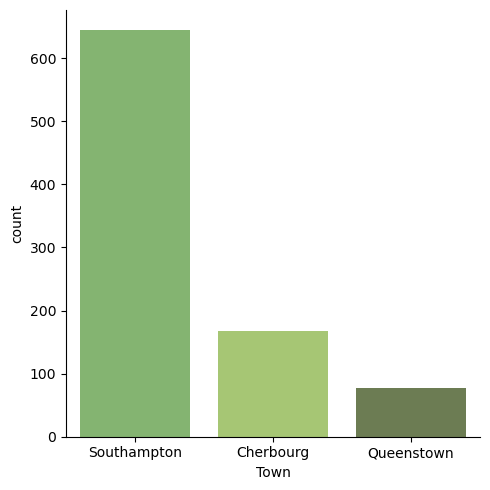

In [112]:
sns.catplot(town_df,x='Town',kind='count',palette='summer_d')

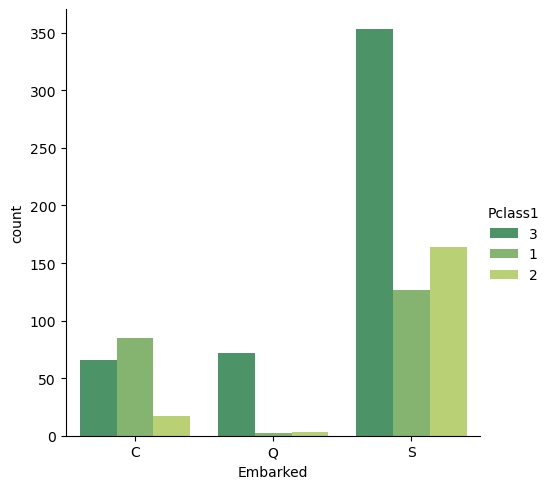

In [116]:
sns.catplot(df,x='Embarked',kind='count',palette='summer',hue='Pclass1',order=['C','Q','S'])

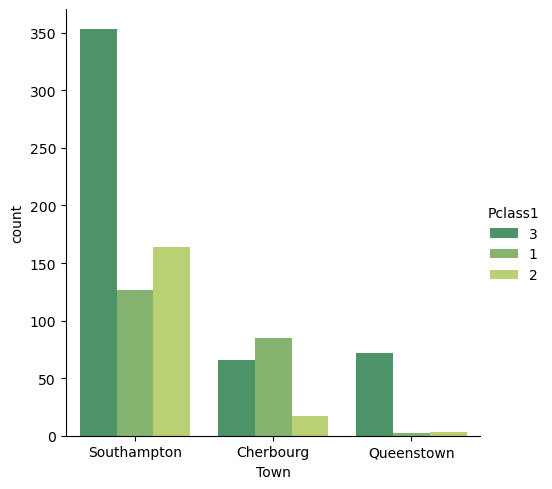

In [117]:
df['Town']=df['Embarked'].map(dict)
sns.catplot(df,x='Town',kind='count',palette='summer',hue='Pclass1',order=["Southampton","Cherbourg","Queenstown"])

In [151]:
df['Alone']= df.Parch + df.SibSp
df['Alone'].loc[df['Alone']>0] = "With Family"
df['Alone'].loc[df['Alone']==0]= "Alone"


C:\Users\cheta\AppData\Local\Temp\ipykernel_4460\116215881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'].loc[df['Alone']>0] = "With Family"
C:\Users\cheta\AppData\Local\Temp\ipykernel_4460\116215881.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Alone'].loc[df['Alone']>0] = "With Family"


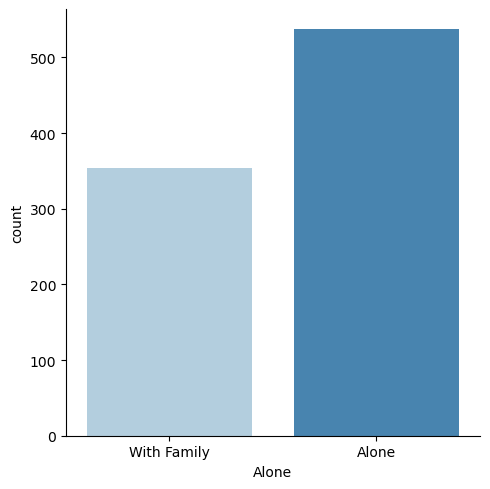

In [156]:
sns.catplot(df,x='Alone',kind='count',palette='Blues')

In [157]:
df['Survivor']=df.Survived.map({0:'No',1:'Yes'})

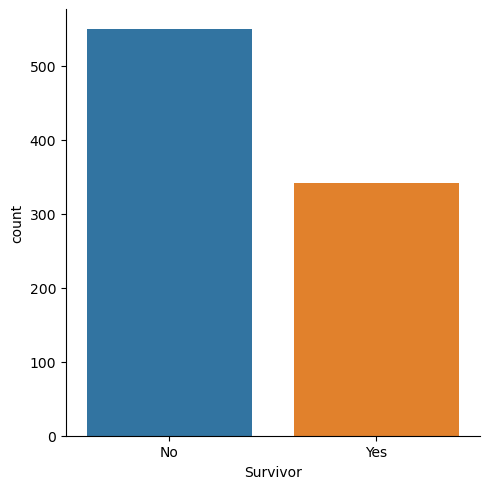

In [159]:
sns.catplot(df,x='Survivor',kind='count')

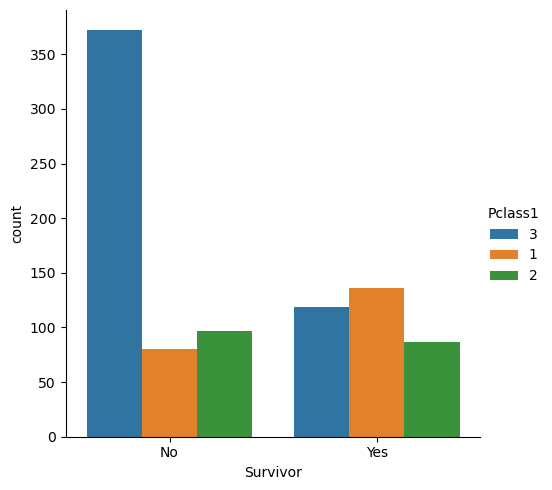

In [163]:
sns.catplot(df,x='Survivor',kind='count',hue='Pclass1')

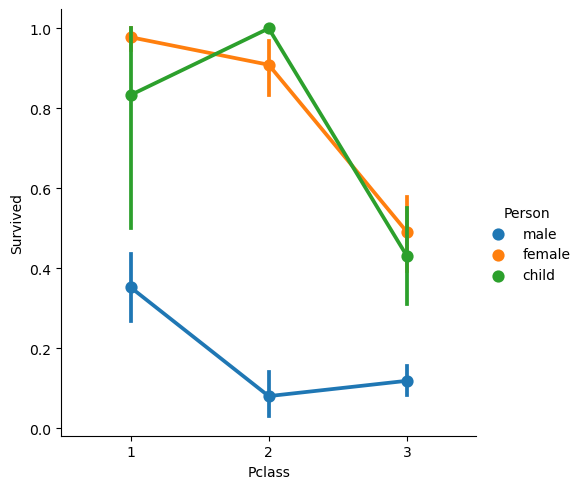

In [166]:
sns.catplot(df,x='Pclass',y='Survived',kind='point',hue='Person')

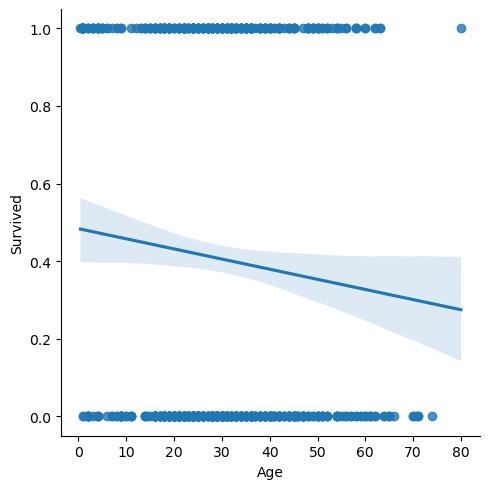

In [170]:
sns.lmplot(df,x='Age',y='Survived',palette='winter')

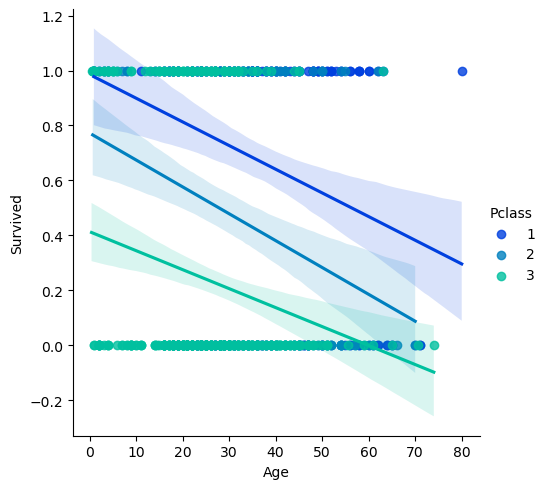

In [171]:
sns.lmplot(df,x='Age',y='Survived',hue='Pclass',palette='winter')

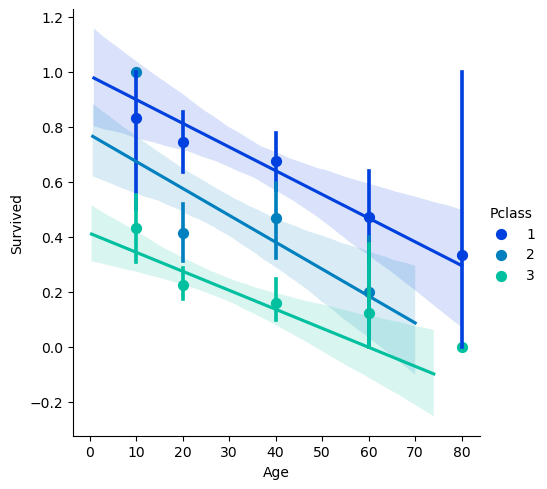

In [172]:
Age_bins=[10,20,40,60,80]
sns.lmplot(df,x='Age',y='Survived',hue='Pclass',palette='winter',x_bins=Age_bins)

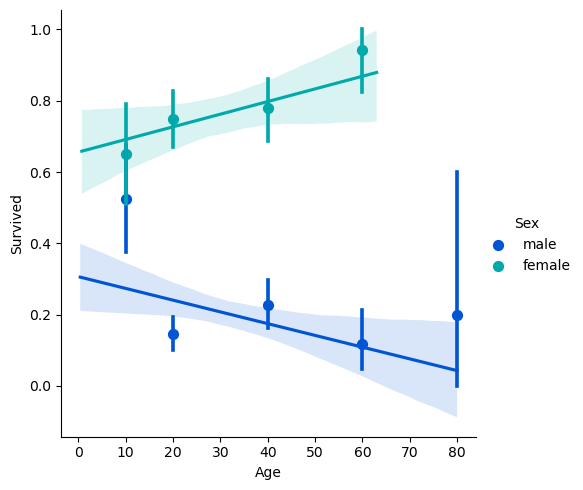

In [173]:
sns.lmplot(df,x='Age',y='Survived',hue='Sex',palette='winter',x_bins=Age_bins)

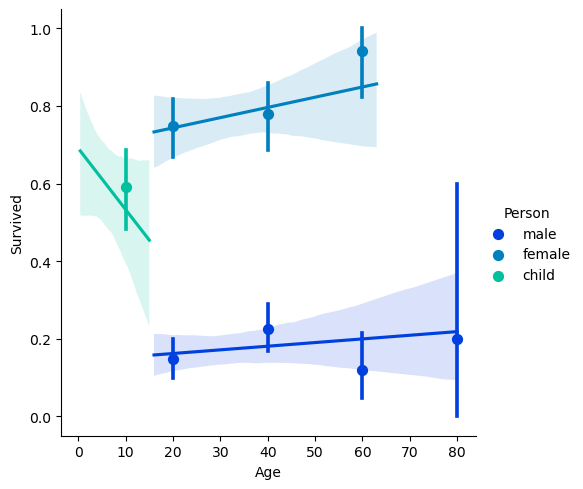

In [174]:
sns.lmplot(df,x='Age',y='Survived',hue='Person',palette='winter',x_bins=Age_bins)

In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Person,Survivor,Pclass1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,male,No,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,female,Yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,female,Yes,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,female,Yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,male,No,3


In [183]:
df_temp= df.dropna(axis=0, subset=['Cabin'])
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Person,Survivor,Pclass1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,female,Yes,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,female,Yes,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,male,No,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,With Family,child,Yes,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Alone,female,Yes,1


In [201]:
df_temp = df_temp[df_temp.deck!='T']
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Person,Survivor,Pclass1,deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,female,Yes,1,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,female,Yes,1,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,male,No,1,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,With Family,child,Yes,3,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Alone,female,Yes,1,C


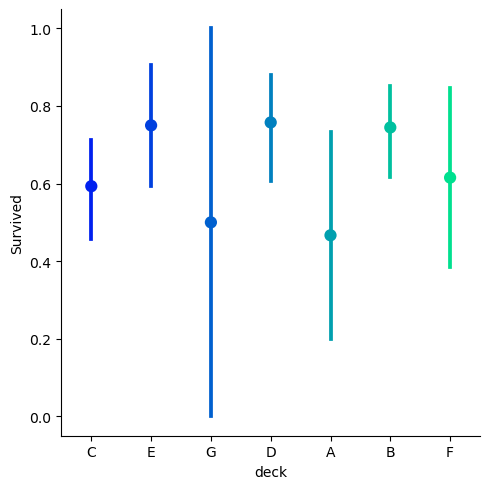

In [202]:
sns.catplot(df_temp,x='deck',y='Survived',kind='point',palette='winter')

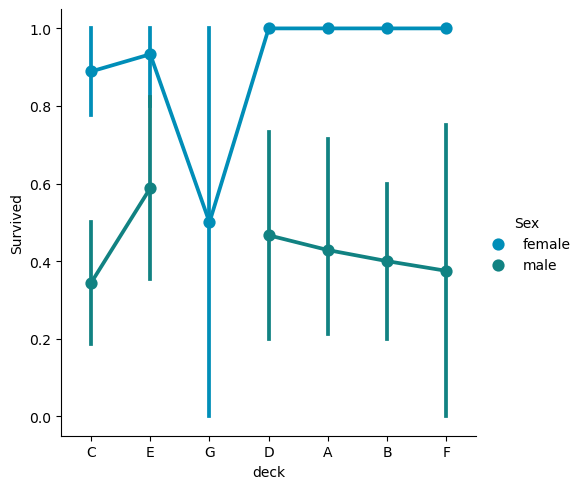

In [203]:
sns.catplot(df_temp,x='deck',y='Survived',kind='point',palette='winter_d',hue='Sex')

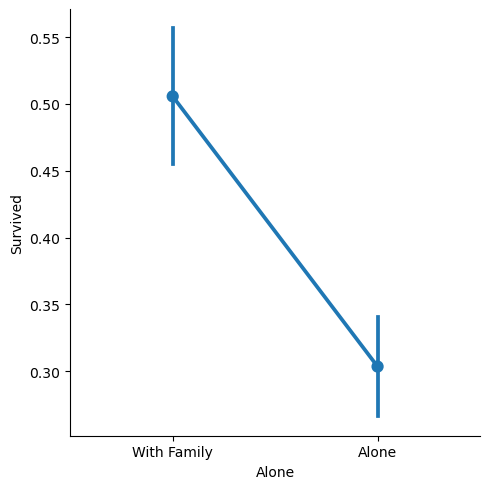

In [208]:
sns.catplot(df,x='Alone',y='Survived',kind='point')

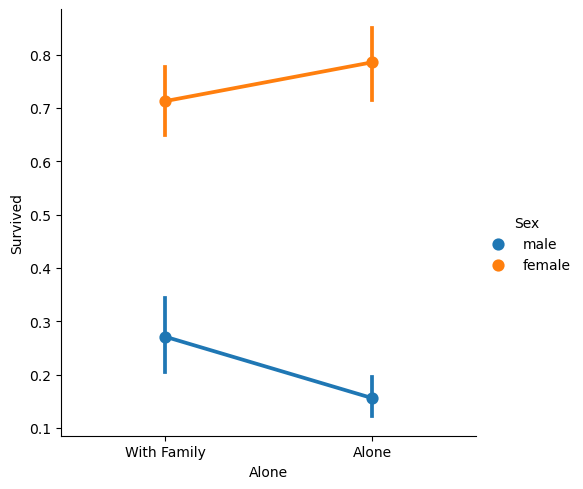

In [209]:
sns.catplot(df,x='Alone',y='Survived',kind='point',hue='Sex')